In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [10]:
import qiskit
from qiskit_experiments.library import T2Ramsey
from qiskit_experiments.framework import ParallelExperiment

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_lima')

ibmqfactory.load_account:WARNING:2021-10-06 03:53:44,633: Credentials are already in use. The existing account in the session will be replaced.


In [5]:
# get the basic feautures including qubit number of the backend.
config = backend.configuration()

print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))

This backend is called ibmq_lima, and is on version 1.0.18. It has 5 qubits. It does not support OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].


In [53]:
T2_exps=[]
delays = list(range(1, 50, 1))

for i in range(config.n_qubits):
    exp = T2Ramsey(qubit=i,
            delays=delays,
            unit="us",
                  osc_freq=1e5)
    exp.set_analysis_options(plot=True)
    T2_exps.append(exp)
    
 
print(T2_exps)

[<qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f849cf89df0>, <qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f849cf89e50>, <qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f849cf896a0>, <qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f849cf89bb0>, <qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f8425828130>]


In [54]:
parallel_exp = ParallelExperiment(T2_exps)
parallel_data = parallel_exp.run(backend).block_for_results()

In [12]:
print(exp.circuits()[3])

     ┌───┐┌──────────────┐┌───────┐ ░ ┌───┐ ░ ┌─┐
q_0: ┤ H ├┤ Delay(4[us]) ├┤ Rz(0) ├─░─┤ H ├─░─┤M├
     └───┘└──────────────┘└───────┘ ░ └───┘ ░ └╥┘
c: 1/══════════════════════════════════════════╩═
                                               0 


In [49]:
# View result data
for result in parallel_data.analysis_results():
    print(result)
    print("\nextra:")
    print(result.extra)

DbAnalysisResultV1
- name: parallel_experiment
- value: 5
- extra: <2 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3', 'Q4']
- verified: False

extra:
{'experiment_types': ['T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey'], 'experiment_ids': ['dc3b8dc9-2d6b-41d2-90b7-2a39a87d09f2', '725bf54e-164c-476c-b6f0-824eec7db132', 'd72055cf-e619-4d1e-b7fe-fb49121ab414', '59b328db-9122-4b8f-8aa6-b771613f7c01', '4ef6c05a-6ea3-427b-a146-034824d75c77']}


Component experiment 0


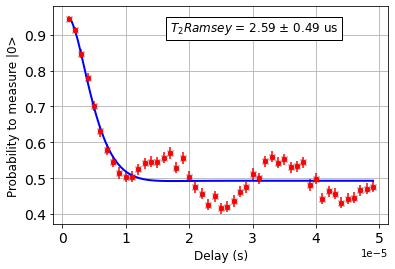

DbAnalysisResultV1
- name: T2star
- value: 2.587763066988959e-06 ± 4.861296393268532e-07 s
- χ²: 7.841924707790944
- quality: bad
- extra: <10 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 30330.46275201247 ± 7904.274066964896 Hz
- χ²: 7.841924707790944
- quality: bad
- extra: <10 items>
- device_components: ['Q0']
- verified: False
Component experiment 1


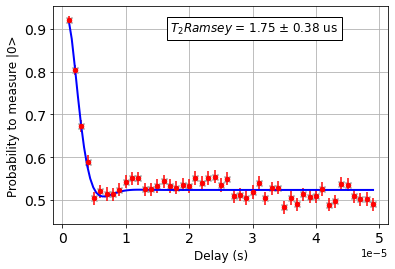

DbAnalysisResultV1
- name: T2star
- value: 1.7470931526852868e-06 ± 3.81620844877249e-07 s
- χ²: 1.5801497696665117
- quality: bad
- extra: <10 items>
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 87509.40178375931 ± 9363.388112560515 Hz
- χ²: 1.5801497696665117
- quality: bad
- extra: <10 items>
- device_components: ['Q1']
- verified: False
Component experiment 2


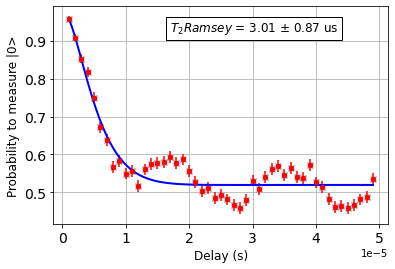

DbAnalysisResultV1
- name: T2star
- value: 3.0090031275429624e-06 ± 8.674760864900826e-07 s
- χ²: 6.307788114318621
- quality: bad
- extra: <10 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 17584.84594797173 ± 15178.10416541737 Hz
- χ²: 6.307788114318621
- quality: bad
- extra: <10 items>
- device_components: ['Q2']
- verified: False
Component experiment 3


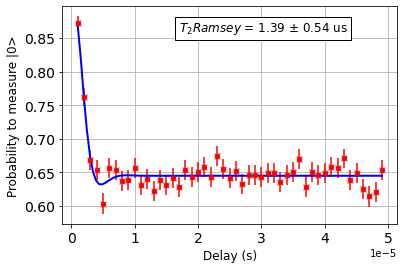

DbAnalysisResultV1
- name: T2star
- value: 1.391805624459046e-06 ± 5.448009693363144e-07 s
- χ²: 0.885194809917762
- quality: bad
- extra: <10 items>
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 122951.77249368827 ± 35984.47441630337 Hz
- χ²: 0.885194809917762
- quality: bad
- extra: <10 items>
- device_components: ['Q3']
- verified: False
Component experiment 4


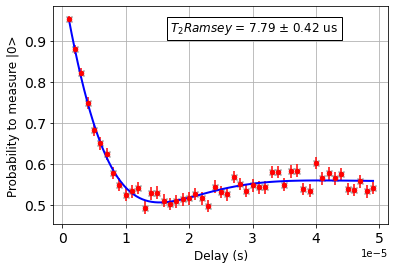

DbAnalysisResultV1
- name: T2star
- value: 7.791409584154377e-06 ± 4.2487118603700023e-07 s
- χ²: 1.259199150309948
- quality: bad
- extra: <10 items>
- device_components: ['Q4']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 19769.341661810067 ± 2884.3416279155476 Hz
- χ²: 1.259199150309948
- quality: bad
- extra: <10 items>
- device_components: ['Q4']
- verified: False


In [55]:
# Print sub-experiment data
for i in range(parallel_exp.num_experiments):
    print(f"Component experiment {i}")
    sub_data = parallel_data.component_experiment_data(i)
    display(sub_data.figure(0))
    for result in sub_data.analysis_results():
        print(result)
        
